In [2]:
import sklearn
sklearn.__version__

'0.24.1'

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import pickle
warnings.simplefilter('ignore')
%matplotlib inline

In [29]:
data = pd.read_csv('Language Detection.csv')

In [30]:
print(data.shape)
data.head()

(10337, 2)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [31]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [32]:
print('Number of Languages in the data set = ',data['Language'].nunique())
data['Language'].unique()

Number of Languages in the data set =  17


array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

<AxesSubplot:xlabel='Language', ylabel='count'>

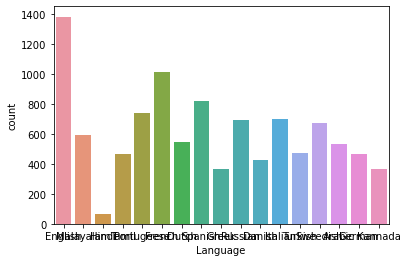

In [33]:
sns.countplot(data['Language'])

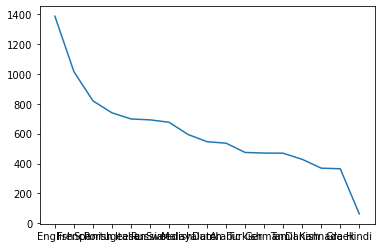

In [34]:
plt.plot(data['Language'].value_counts())

# Enginnering

In [35]:
X = data['Text']
y = data['Language']

In [36]:
le =  LabelEncoder()
y = le.fit_transform(y)

In [37]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [38]:
# mapping

data_list = []

for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text) # we want to ignore figures and alphanumerics
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [39]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.20,
                                                   random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8269,), (2068,), (8269,), (2068,))

In [41]:
# creating bags of words

cv = CountVectorizer()
cv.fit(X_train)

X_train = cv.transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [42]:
type(X_train)

numpy.ndarray

In [46]:
%%time

model = MultinomialNB()

model.fit(X_train, y_train)

Wall time: 2min 4s


MultinomialNB()

In [47]:
preds = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(preds, y_test)
print('Accuracy score = ', acc)
print(classification_report(preds, y_test))

Accuracy score =  0.9825918762088974
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       104
           1       0.96      0.97      0.97        72
           2       0.97      0.99      0.98       109
           3       1.00      0.92      0.96       318
           4       0.99      0.99      0.99       220
           5       0.97      1.00      0.98        90
           6       0.97      1.00      0.99        66
           7       1.00      1.00      1.00        10
           8       0.99      1.00      1.00       144
           9       1.00      1.00      1.00        66
          10       0.98      1.00      0.99       119
          11       0.98      0.99      0.99       142
          12       0.99      1.00      0.99       134
          13       0.97      0.99      0.98       158
          14       0.98      1.00      0.99       131
          15       0.99      1.00      0.99        86
          16       0.94      1.00      0.97 

<AxesSubplot:>

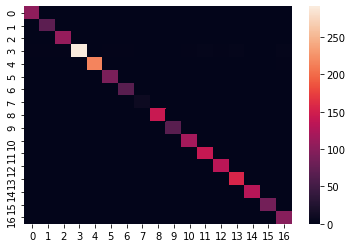

In [18]:
#sns.heatmap(confusion_matrix(preds, y_test)) # print(confusion_matrix(preds, y_test))

# Pipeline

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                   y,
                                                   test_size=0.20,
                                                   random_state=42)

In [54]:
%%time
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('vectorizer', cv),
                    ('multinomialNB', model)])

pipeline.fit(X_train2, y_train2)

Wall time: 1.45 s


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [55]:
preds2 = pipeline.predict(X_test2)
acc2 = accuracy_score(preds2, y_test2)
print(acc2)

0.9825918762088974


In [56]:
with open('trained_pipeline-0.1.0.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [60]:
# creating a zipped file containing the pickled model/pipeline
# !zip -r ./trained_pipeline-0.1.0.pkl.zip ./trained_pipeline-0.1.0.pkl

'zip' is not recognized as an internal or external command,
operable program or batch file.


# TEST

In [59]:
#text = 'Hello, Hi, Bye Bye'
text = 'ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್'
result = pipeline.predict([text])

le.classes_[result[0]], result

('Kannada', array([9]))

In [58]:
data.tail(5)

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada
